# Az intercepció hatása a növényzet számára hasznosítható csapadék mértékének alakulására

Az erdei fák számára felvehető csapadék mértékét jelentősen befolyásolja az a vízmennyiség, amit a lombfelület megköt és újra elpárologtat anélkül, hogy az elérhetné a talajfelszínt. Hazai környezetben fenyő esetén a talajfelszínen található vastag száraz tűavar ezt a hatás jelentősen fokozhatja. Az élő lomb és a száraz avar együttes hatásaként visszatartott csapadékmennyiség elérheti az 5-10 mm mértéket, ami sok esetben a teljes csapadékesemény 30-50%-át is jelentheti.

<img src="https://github.com/jsheperd/forest_water/blob/master/img/csapadek.png?raw=true" width="300" height="300" />

### Hipotézis

A növényzet számára felvehető csapadék alakulását nem csak az éves csapadékösszeg befolyásolja, de az eloszlási mintázat is meghatározó. A modellezhetőség szempontjából a legfontosabb tényezők a lombfelület aktuális nagysága, valamint az adott csapdékesemény mértéke mm-ben. A felszíni elfolyást és a mélybeszivárgást első vizsgálatainkban nem vesszük figyelembe, mert azok modellezéséhez további domborzati és talajtani paraméterek is szükségesek.

### Felhasznált adatok

Az [Országos meteorológia Szolgálat 1901-2010 éghajalati adasorai](http://www.met.hu/eghajlat/magyarorszag_eghajlata/eghajlati_adatsorok/) napi csapdékeseményeket is tartalmaznak, ami alkalmas arra, hogy becsléseket tegyünk az aktuális csapadékesemény intercepciós veszteségére 110 éves időszakra vonatkozóan.

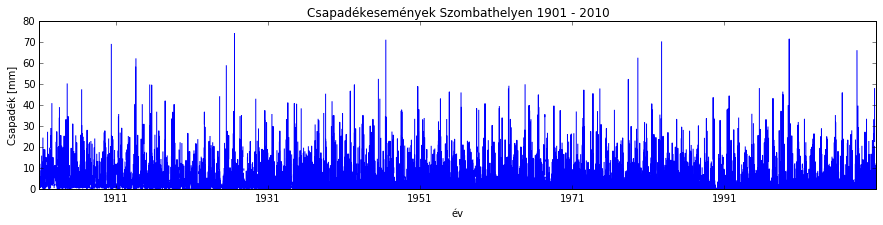

In [16]:
%matplotlib inline
import pandas as pd
from pandas import Series, DataFrame, Panel
import matplotlib.pyplot as plt
import numpy as np


dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
szo_daily = pd.read_csv('https://raw.githubusercontent.com/jsheperd/forest_water/master/data/SZO_d.txt', 
                        sep=';',
                        parse_dates=['#datum'], 
                        date_parser=lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
                        )

szo_daily.set_index(szo_daily['#datum'])
plt.subplots(figsize=(15, 3))
plt.plot('#datum', 'd_rs', data=szo_daily)
plt.ylabel(u'Csapadék [mm]')
plt.xlabel(u'év')
plt.title(u'Csapadékesemények Szombathelyen 1901 - 2010')

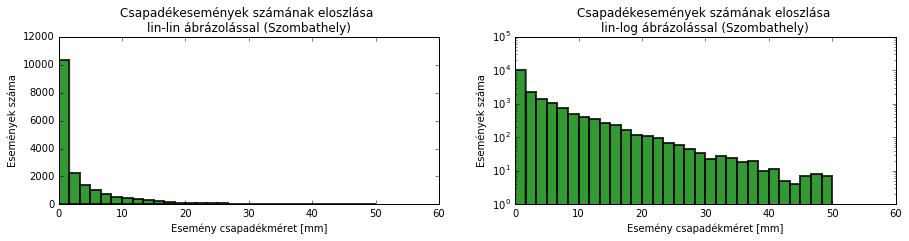

In [9]:
plt.subplots(figsize=(15,3))
plt.subplot(121)
plt.hist(x=szo_daily['d_rs'], bins=30, range=[0, 50], color='green', alpha=0.8, lw=2)
plt.title(u'Csapadékesemények számának eloszlása \nlin-lin ábrázolással (Szombathely)')
plt.ylabel(u'Események száma')
plt.xlabel(u'Esemény csapadékméret [mm]')
plt.subplot(122)
plt.yscale('log')
plt.hist(x=szo_daily['d_rs'], bins=30, range=[0, 50], color='green', alpha=0.8, lw=2)
plt.title(u'Csapadékesemények számának eloszlása \nlin-log ábrázolással (Szombathely)')
plt.ylabel(u'Események száma')
plt.xlabel(u'Esemény csapadékméret [mm]')


,From,To,Count
0,0.000000,1.666667,4009.3
1,1.666667,3.333333,5489.5
2,3.333333,5.000000,5518.8
3,5.000000,6.666667,5934.3
4,6.666667,8.333333,5650.9
5,8.333333,10.000000,4540.0
6,10.000000,11.666667,4477.3
7,11.666667,13.333333,4325.0
8,13.333333,15.000000,3863.6
9,15.000000,16.666667,3569.6


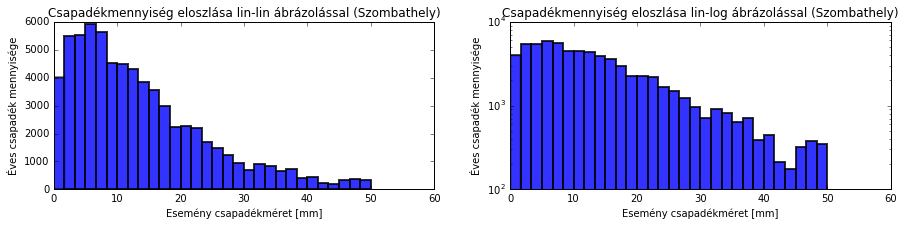

In [88]:
plt.subplots(figsize=(15,3))
plt.grid()
plt.subplot(121)
p = plt.hist(x=szo_daily['d_rs'], bins=30, range=[0, 50], color='blue', alpha=0.8, lw=2, weights=szo_daily['d_rs'])
df = pd.DataFrame({'From':p[1][:-1], 'To': p[1][1:], 'Count': p[0]})
display(df[['From', 'To', 'Count']])

plt.title(u'Csapadékmennyiség eloszlása lin-lin ábrázolással (Szombathely)')
plt.ylabel(u'Éves csapadék mennyisége')
plt.xlabel(u'Esemény csapadékméret [mm]')
plt.subplot(122)
plt.yscale('log')

plt.hist(x=szo_daily['d_rs'], bins=30, range=[0, 50], color='blue', alpha=0.8, lw=2, weights=szo_daily['d_rs'])
plt.title(u'Csapadékmennyiség eloszlása lin-log ábrázolással (Szombathely)')
plt.ylabel(u'Éves csapadék mennyisége')
plt.xlabel(u'Esemény csapadékméret [mm]')

,from,to,val
0,0.0,5.0,13973
1,5.0,10.0,2288
2,10.0,15.0,1040
3,15.0,20.0,515
4,20.0,25.0,278
5,25.0,30.0,136
6,30.0,35.0,75
7,35.0,40.0,47
8,40.0,45.0,20
9,45.0,50.0,22


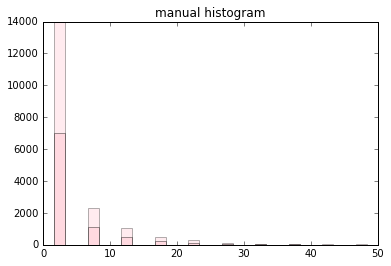

In [71]:
#print help(np.histogram, bins=30)
#print szo_daily['d_rs']
hist, bins = np.histogram(szo_daily['d_rs'], bins=10, range=[0, 50])

center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=50.0/30.0, color='pink', alpha=0.3)
plt.bar(center, hist/2, align='center', width=50.0/30.0, color='pink', alpha=0.4)
plt.title('manual histogram')

display(pd.DataFrame({'val' : hist, 'from' : bins[:-1], 'to' : bins[1:]}))
